In [132]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
import os

https://www.ncei.noaa.gov/ data for JOÃO PESSOA - NORTHEAST BRAZIL

In [133]:
path = r"/content/drive/MyDrive/datasets/weather/joaopessoa2000-2022.csv"
df = pd.read_csv(path)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    6350 non-null   object 
 1   NAME       6350 non-null   object 
 2   LATITUDE   6350 non-null   float64
 3   LONGITUDE  6350 non-null   float64
 4   ELEVATION  6350 non-null   float64
 5   DATE       6350 non-null   object 
 6   PRCP       836 non-null    float64
 7   TAVG       6350 non-null   float64
 8   TMAX       475 non-null    float64
 9   TMIN       446 non-null    float64
dtypes: float64(7), object(3)
memory usage: 496.2+ KB


In [135]:
df.drop(["PRCP", "TMIN","TMAX"], axis =1 , inplace=True)
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG
0,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2000-01-01,26.5
1,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2000-01-02,26.7
2,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2000-01-03,25.8
3,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2000-01-04,25.6
4,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2000-01-05,24.2
...,...,...,...,...,...,...,...
6345,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2022-12-27,27.2
6346,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2022-12-28,27.4
6347,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2022-12-29,27.9
6348,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2022-12-30,27.8


In [136]:
df.DATE = df.DATE.apply(lambda d : dt.datetime.strptime(d, "%Y-%m-%d"))
df['MONTH']= df.DATE.apply(lambda d: d.month)


In [137]:
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,MONTH
0,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2000-01-01,26.5,1
1,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2000-01-02,26.7,1
2,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2000-01-03,25.8,1
3,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2000-01-04,25.6,1
4,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2000-01-05,24.2,1
...,...,...,...,...,...,...,...,...
6345,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2022-12-27,27.2,12
6346,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2022-12-28,27.4,12
6347,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2022-12-29,27.9,12
6348,BR039402250,"JOAO PESSOA, BR",-7.1,-34.867,66.0,2022-12-30,27.8,12


In [138]:
start = 2008
end = 2022
months = [1,2,3]
means = []
for y in range(start, end + 1):
  means.append(df[(df["DATE"].dt.year == y) & (df["DATE"].dt.month.apply(lambda x : x in months))].TAVG.mean())


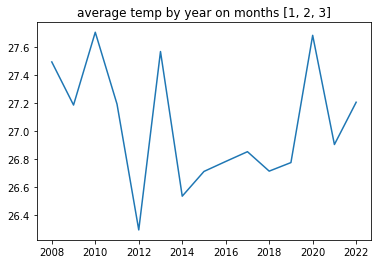

In [139]:
plt.plot([y for y in range(start, end + 1)], means)
plt.title(f"average temp by year on months {months}")
plt.set_cmap('coolwarm')
plt.show()

INMET DATA FOR BRAZIL'S NORTHEAST REGION

In [141]:
folder = r"/content/drive/MyDrive/datasets/weather/INMET northeast BR"

In [142]:
files = [os.path.join(folder, file) for file in os.listdir(folder) if file.endswith(".csv")]

In [282]:
city =  "JOAO PESSOA"
filtered = []
for file in files:
  with open(file, 'r', encoding='utf8') as f:
    if city in f.read():
      filtered.append(file)

if not filtered:
  raise Exception(f"No city {city} found.")

In [283]:
columns = "DATE,PRECP,TEMP_MAX,TEMP_MEAN,TEMP_MIN".split(",")
jp = pd.read_csv(filtered[0], skiprows=15, sep=";")
jp.drop([col for col in jp.columns if "Unnamed" in col], axis =1 , inplace=True)
jp.columns = columns


In [284]:
jp.DATE = jp.DATE.apply(lambda d : dt.datetime.strptime(d, "%Y-%m-%d"))

In [285]:
jp = jp.fillna(jp.mean())

<ipython-input-285-92995c0789d0>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  jp = jp.fillna(jp.mean())


In [286]:
jp[jp.TEMP_MAX == jp.TEMP_MAX.max()]  # hottest day since 2007

,DATE,PRECP,TEMP_MAX,TEMP_MEAN,TEMP_MIN
4570,2020-01-28,0.0,34.5,28.816667,26.4


In [287]:
jp.DATE.min()

Timestamp('2007-07-25 00:00:00')

In [290]:
jp

,DATE,PRECP,TEMP_MAX,TEMP_MEAN,TEMP_MIN
0,2007-07-25,0.00000,29.0,25.004167,20.9
1,2007-07-26,2.80000,28.4,24.625000,22.3
2,2007-07-27,11.80000,28.5,24.895833,22.0
3,2007-07-28,5.19981,28.3,26.452469,20.0
4,2007-07-29,1.20000,28.3,24.212500,21.5
...,...,...,...,...,...
5634,2022-12-27,0.00000,32.7,27.837500,24.5
5635,2022-12-28,1.00000,32.3,27.878261,24.8
5636,2022-12-29,0.00000,33.0,28.577273,26.2
5637,2022-12-30,0.00000,33.1,28.447826,26.1


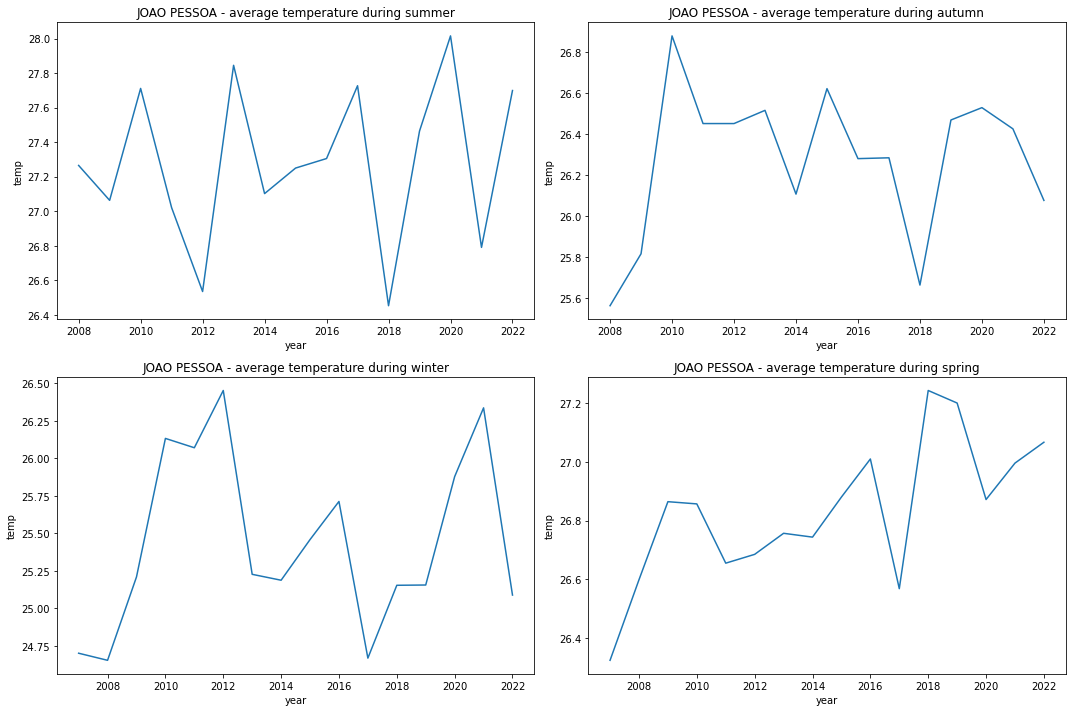

In [314]:
start = 2007
end = 2022
seasons = {"summer": (1,2,3) ,"autumn":(4,5,6) , "winter": (7,8,9), "spring": (10,11,12)}
season = "spring"




fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# flatten the 2D array of axes so we can iterate through them easily
axs = axs.ravel()

for i, season in enumerate(seasons.keys()):
    avgtemps = []
    for y in range(start, end + 1):
        avgtemps.append(jp[(jp["DATE"].dt.year == y) & (jp["DATE"].dt.month.apply(lambda x : x in seasons[season]))].TEMP_MEAN.mean())
    data = {'year': [y for y in range(start, end + 1)], 'temp': avgtemps}
    snsdf = pd.DataFrame(data)
    
    sns.lineplot(x="year", y="temp", data=snsdf, ax=axs[i])
    axs[i].set_title(f"{city} - average temperature during {season}")

fig.tight_layout()
plt.show()



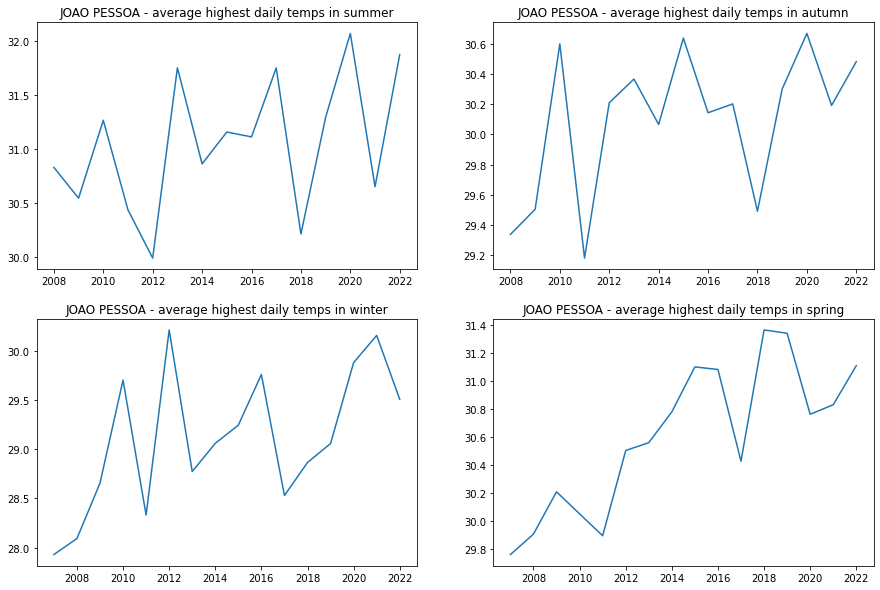

In [310]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

#colors = {'summer':'red', 'autumn':'orange', 'winter':'blue', 'spring':'green'}

for i, season in enumerate(seasons.keys()):
    maxtemps = []
    for y in range(start, end + 1):
        maxtemps.append(jp[(jp["DATE"].dt.year == y) & (jp["DATE"].dt.month.apply(lambda x : x in seasons[season]))].TEMP_MAX.mean())
    axs[i].plot([y for y in range(start, end + 1)], maxtemps)# color=colors[season])
    axs[i].set_title(f"{city} - average highest daily temps in {season}")
  



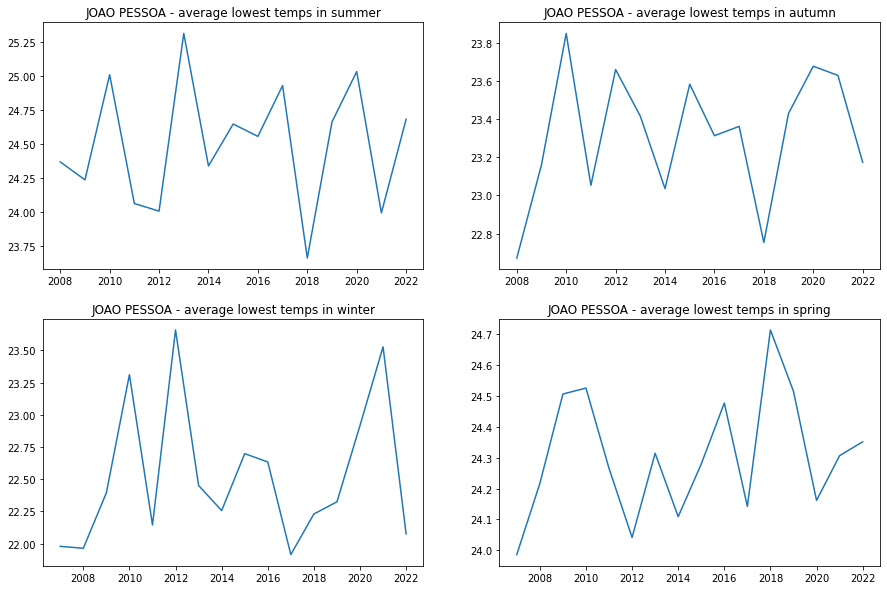

In [311]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

#colors = {'summer':'red', 'autumn':'orange', 'winter':'blue', 'spring':'green'}

for i, season in enumerate(seasons.keys()):
    mintemps = []
    for y in range(start, end + 1):
        mintemps.append(jp[(jp["DATE"].dt.year == y) & (jp["DATE"].dt.month.apply(lambda x : x in seasons[season]))].TEMP_MIN.mean())
    axs[i].plot([y for y in range(start, end + 1)], mintemps)# color=colors[season])
    axs[i].set_title(f"{city} - average lowest temps in {season}")
  

 **Conclusion: in the short period of 18 years, the temperature has been stable in Northeast Brazil, with small noticeable increase of max temperatures in this period.**